In [1]:
# Iris Flower Classification Project

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# 1. DATA LOADING AND EXPLORATION

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (150, 6)


In [4]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
 5   species_name       150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB
None


In [5]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [6]:
print("\nSpecies Distribution:")
print(df['species_name'].value_counts())


Species Distribution:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [7]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64


In [8]:
# 2. DATA VISUALIZATION

# Define features and species info
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
colors = ['red', 'green', 'blue']
species_names = ['setosa', 'versicolor', 'virginica']

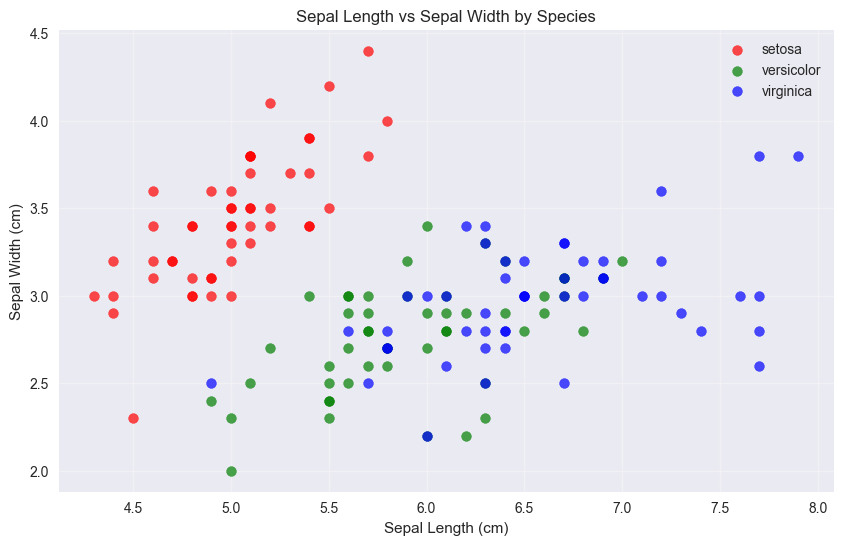

In [9]:
# 2.1 Sepal measurements scatter plot
plt.figure(figsize=(10, 6))
for i, species in enumerate(species_names):
    species_data = df[df['species_name'] == species]
    plt.scatter(species_data['sepal length (cm)'], species_data['sepal width (cm)'], 
               c=colors[i], label=species, alpha=0.7, s=50)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width by Species')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

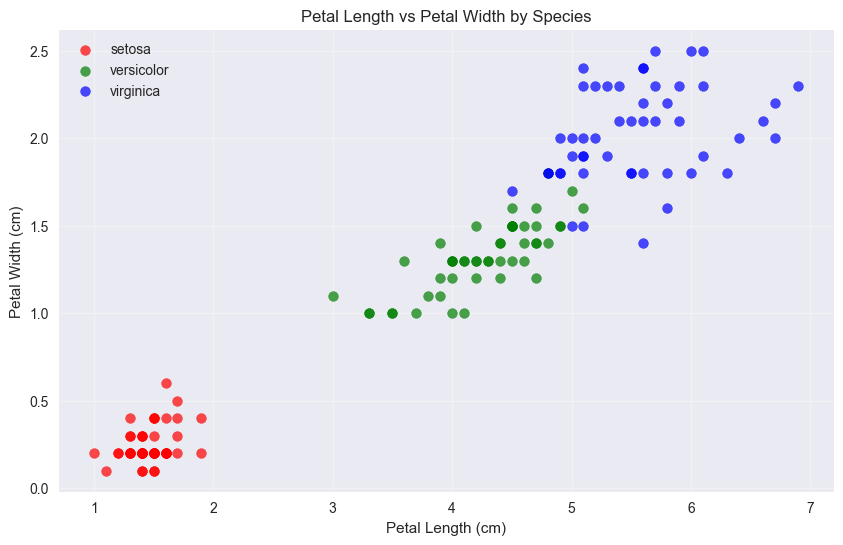

In [10]:
# 2.2 Petal measurements scatter plot
plt.figure(figsize=(10, 6))
for i, species in enumerate(species_names):
    species_data = df[df['species_name'] == species]
    plt.scatter(species_data['petal length (cm)'], species_data['petal width (cm)'], 
               c=colors[i], label=species, alpha=0.7, s=50)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width by Species')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

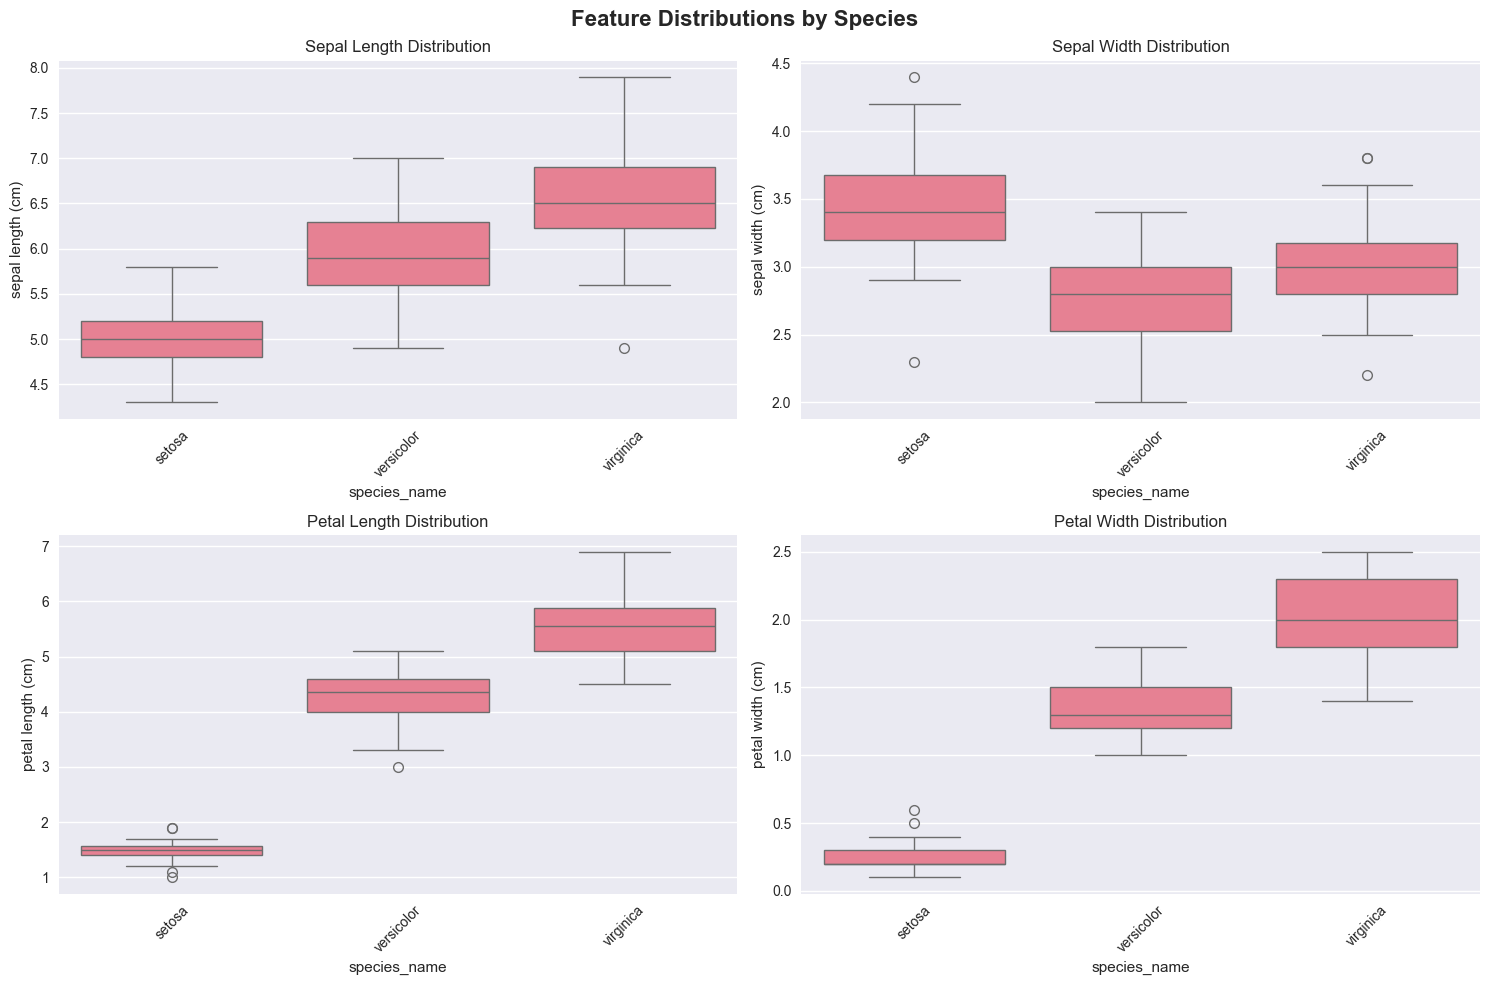

In [11]:
# 2.3 Box plots for each feature
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Feature Distributions by Species', fontsize=16, fontweight='bold')

# Sepal Length box plot
sns.boxplot(data=df, x='species_name', y='sepal length (cm)', ax=axes[0,0])
axes[0,0].set_title('Sepal Length Distribution')
axes[0,0].tick_params(axis='x', rotation=45)

# Sepal Width box plot
sns.boxplot(data=df, x='species_name', y='sepal width (cm)', ax=axes[0,1])
axes[0,1].set_title('Sepal Width Distribution')
axes[0,1].tick_params(axis='x', rotation=45)

# Petal Length box plot
sns.boxplot(data=df, x='species_name', y='petal length (cm)', ax=axes[1,0])
axes[1,0].set_title('Petal Length Distribution')
axes[1,0].tick_params(axis='x', rotation=45)

# Petal Width box plot
sns.boxplot(data=df, x='species_name', y='petal width (cm)', ax=axes[1,1])
axes[1,1].set_title('Petal Width Distribution')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

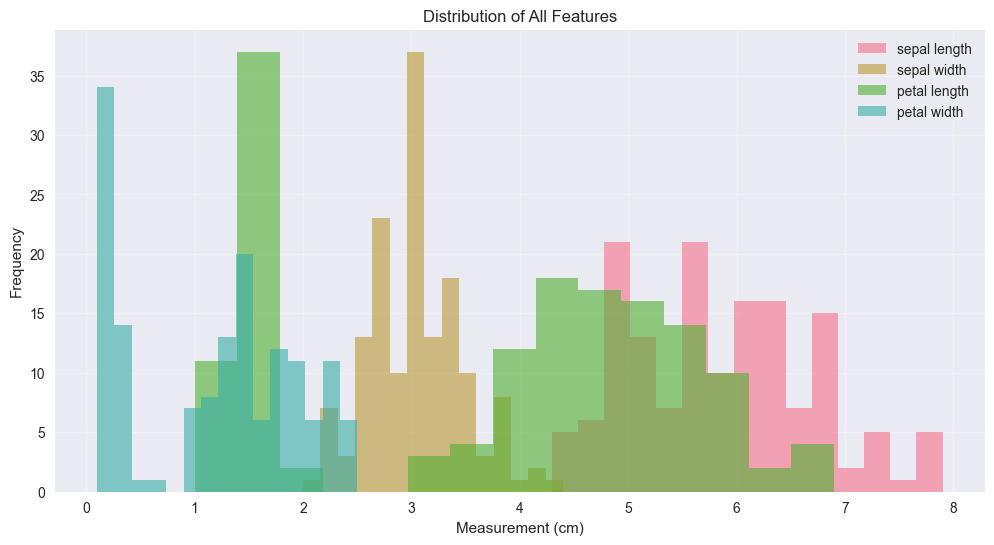

In [12]:
# 2.4 Histogram of all features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.hist(df[feature], alpha=0.6, label=feature.replace(' (cm)', ''), bins=15)
plt.xlabel('Measurement (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of All Features')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

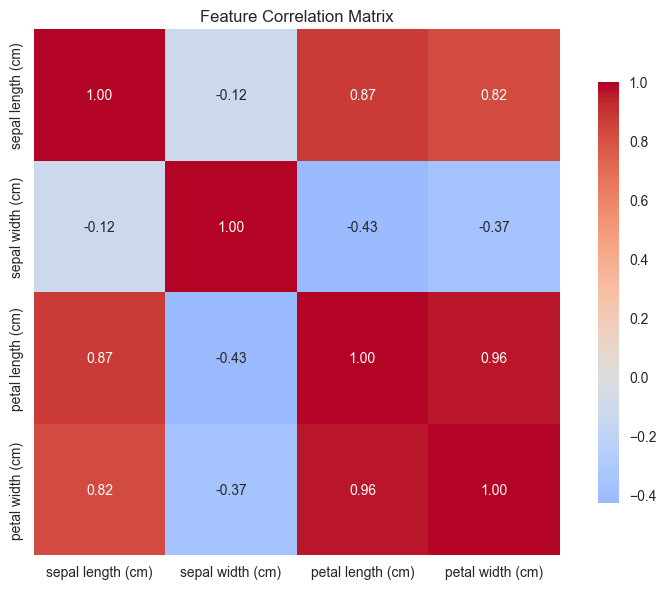

In [13]:
# 2.5 Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

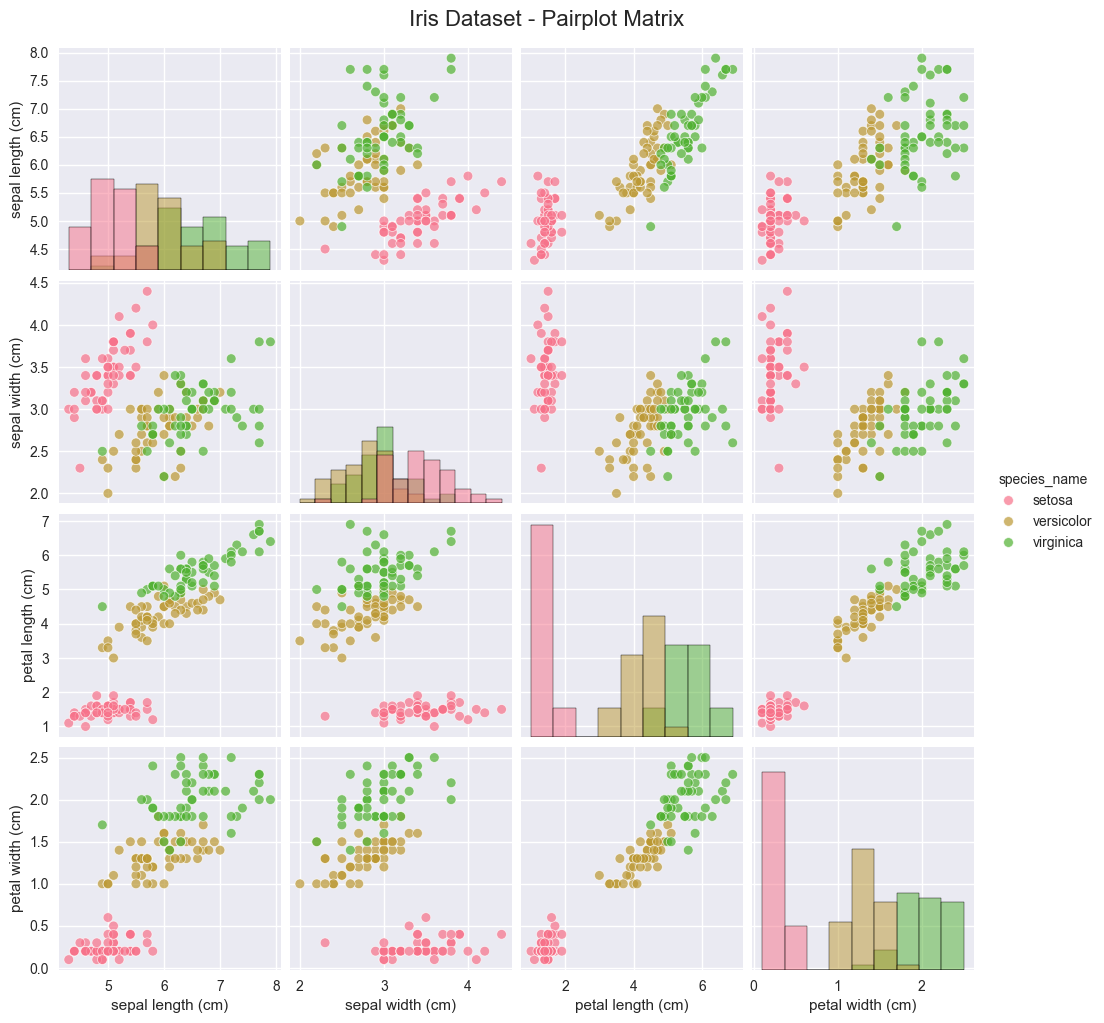

In [14]:
# 3. ADVANCED VISUALIZATIONS

# 3.1 Pairplot using seaborn
plt.figure(figsize=(12, 10))

features_df = df[features + ['species_name']]
g = sns.pairplot(features_df, hue='species_name', diag_kind='hist', plot_kws={'alpha': 0.7}, height=2.5)
g.fig.suptitle('Iris Dataset - Pairplot Matrix', y=1.02, fontsize=16)
plt.show()

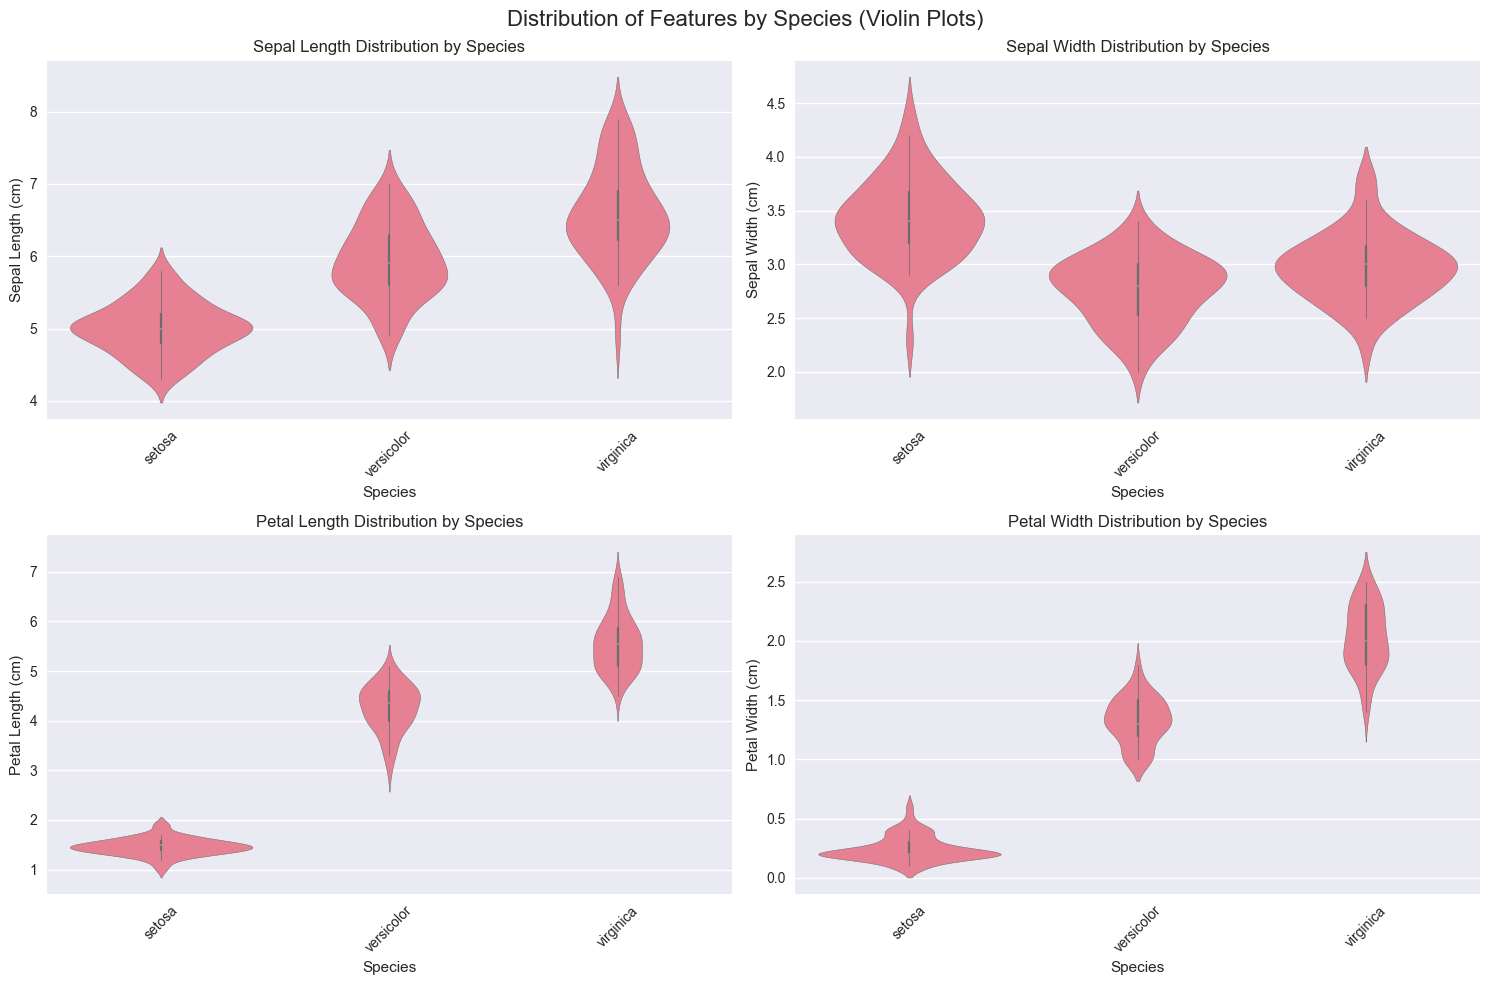

In [15]:
# 3.2 Violin plots for each feature
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Features by Species (Violin Plots)', fontsize=16)

feature_short_names = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

for i, (feature, short_name) in enumerate(zip(features, feature_short_names)):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df, x='species_name', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{short_name} Distribution by Species')
    axes[row, col].set_xlabel('Species')
    axes[row, col].set_ylabel(f'{short_name} (cm)')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

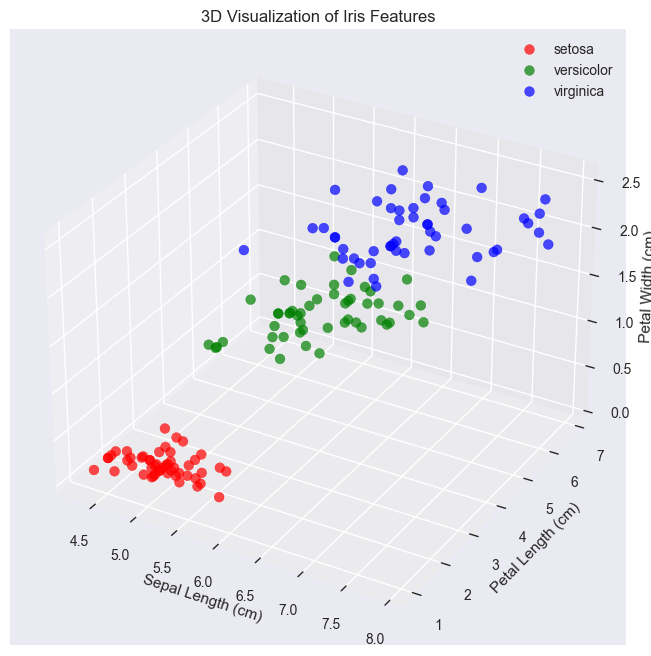

In [16]:
# 3.3 3D scatter plot for better visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each species with different colors
for i, species in enumerate(species_names):
    species_data = df[df['species_name'] == species]
    ax.scatter(species_data['sepal length (cm)'], 
               species_data['petal length (cm)'], 
               species_data['petal width (cm)'],
               c=colors[i], label=species, alpha=0.7, s=50)

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('3D Visualization of Iris Features')
ax.legend()
plt.show()

In [17]:
# 4. DATA PREPROCESSING

# Prepare features and target
X = df[features].values
y = df['species'].values

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")

Feature matrix shape: (150, 4)
Target vector shape: (150,)
Training set size: 120
Test set size: 30
Features scaled successfully!


In [18]:
# 5. MODEL TRAINING AND EVALUATION

# Dictionary to store models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Support Vector Machine': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB()
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}=")
    
    # Train the model
    if name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        # Cross-validation with scaled data
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        # Cross-validation with original data
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'Predictions': y_pred
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-validation: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Training Logistic Regression=
Accuracy: 0.9333
Cross-validation: 0.9583 (+/- 0.0527)

Training K-Nearest Neighbors=
Accuracy: 0.9333
Cross-validation: 0.9583 (+/- 0.0745)

Training Support Vector Machine=
Accuracy: 0.9667
Cross-validation: 0.9667 (+/- 0.0624)

Training Random Forest=
Accuracy: 0.9000
Cross-validation: 0.9500 (+/- 0.0333)

Training Naive Bayes=
Accuracy: 0.9667
Cross-validation: 0.9583 (+/- 0.0527)


In [19]:
# 6. RESULTS COMPARISON

# Create results DataFrame
results_df = pd.DataFrame({
    name: [metrics['Accuracy'], metrics['Precision'], metrics['Recall'], metrics['F1-Score'], metrics['CV Mean']]
    for name, metrics in results.items()}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'CV Mean'])

print("Model Performance Comparison:\n")
print(results_df.round(4))

Model Performance Comparison:

           Logistic Regression  K-Nearest Neighbors  Support Vector Machine  \
Accuracy                0.9333               0.9333                  0.9667   
Precision               0.9333               0.9444                  0.9697   
Recall                  0.9333               0.9333                  0.9667   
F1-Score                0.9333               0.9327                  0.9666   
CV Mean                 0.9583               0.9583                  0.9667   

           Random Forest  Naive Bayes  
Accuracy          0.9000       0.9667  
Precision         0.9024       0.9697  
Recall            0.9000       0.9667  
F1-Score          0.8997       0.9666  
CV Mean           0.9500       0.9583  


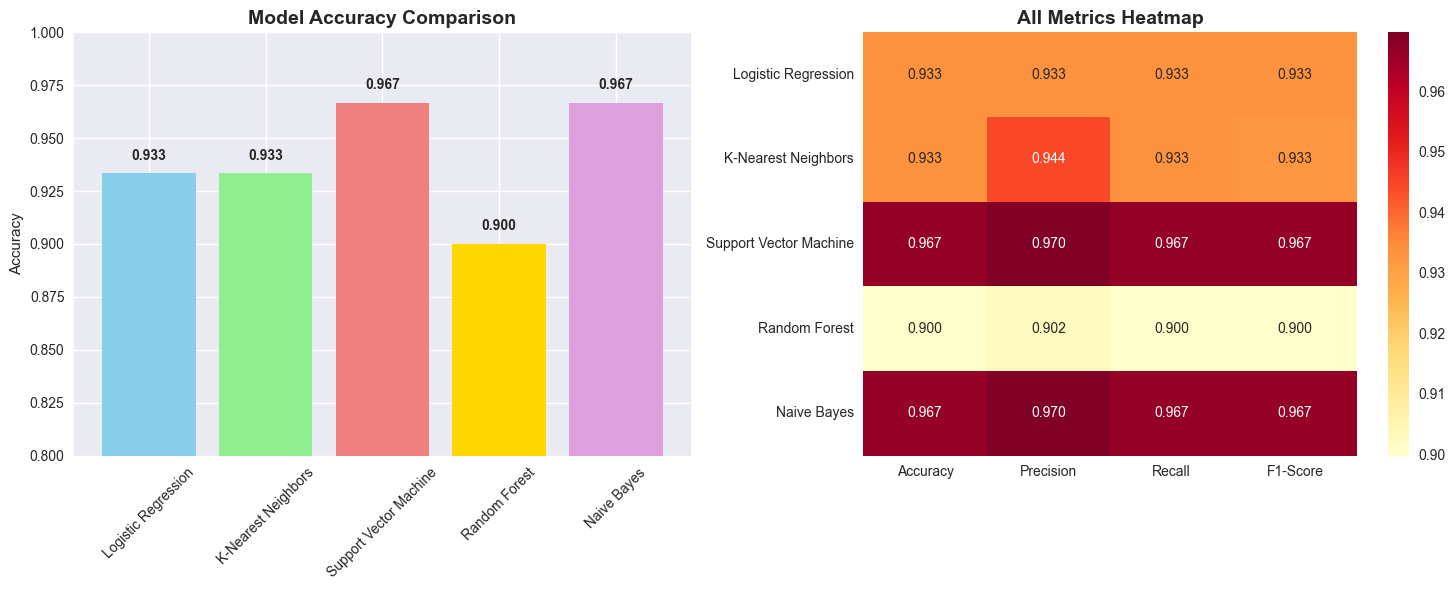

In [20]:
# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot of accuracies
accuracies = [results[name]['Accuracy'] for name in models.keys()]
model_names = list(models.keys())

axes[0].bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum'])
axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0.8, 1.0)
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(accuracies):
    axes[0].text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Heatmap of all metrics
metrics_matrix = results_df.iloc[:-1].T 
sns.heatmap(metrics_matrix, annot=True, cmap='YlOrRd', ax=axes[1], fmt='.3f')
axes[1].set_title('All Metrics Heatmap', fontsize=14, fontweight='bold')
 
plt.tight_layout()
plt.show()

In [21]:
# 7. BEST MODEL ANALYSIS

# Find best model
best_model_name = max(results.keys(), key=lambda x: results[x]['Accuracy'])
best_model = models[best_model_name]
best_predictions = results[best_model_name]['Predictions']

print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {results[best_model_name]['Accuracy']:.4f}")

# Detailed classification report
print(f"\nDetailed Classification Report for {best_model_name}:\n")
print(classification_report(y_test, best_predictions, target_names=['Setosa', 'Versicolor', 'Virginica']))

Best Model: Support Vector Machine
Best Accuracy: 0.9667

Detailed Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



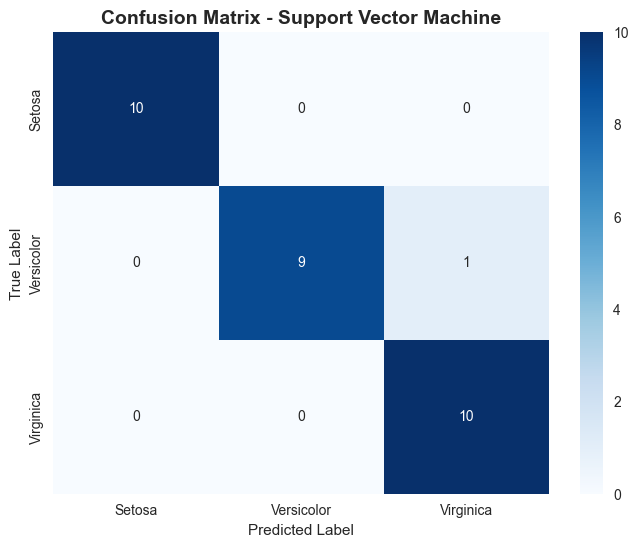

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [23]:
# 8. HYPERPARAMETER TUNING

# Hyperparameter tuning for Random Forest
if 'Random Forest' in [best_model_name] or results['Random Forest']['Accuracy'] > 0.95:
    print("Tuning Random Forest hyperparameters...")
    
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    
    rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), 
                          param_grid, cv=5, scoring='accuracy')
    rf_grid.fit(X_train, y_train)
    
    print(f"Best parameters: {rf_grid.best_params_}")
    print(f"Best cross-validation score: {rf_grid.best_score_:.4f}")
    
    # Test the tuned model
    tuned_predictions = rf_grid.predict(X_test)
    tuned_accuracy = accuracy_score(y_test, tuned_predictions)
    print(f"Tuned model test accuracy: {tuned_accuracy:.4f}")

In [24]:
# 9. FEATURE IMPORTANCE (FOR TREE-BASED MODELS)

# Get feature importance from Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance (Random Forest):\n")
print(feature_importance)

Feature Importance (Random Forest):

             feature  importance
3   petal width (cm)    0.437185
2  petal length (cm)    0.431466
0  sepal length (cm)    0.116349
1   sepal width (cm)    0.015000


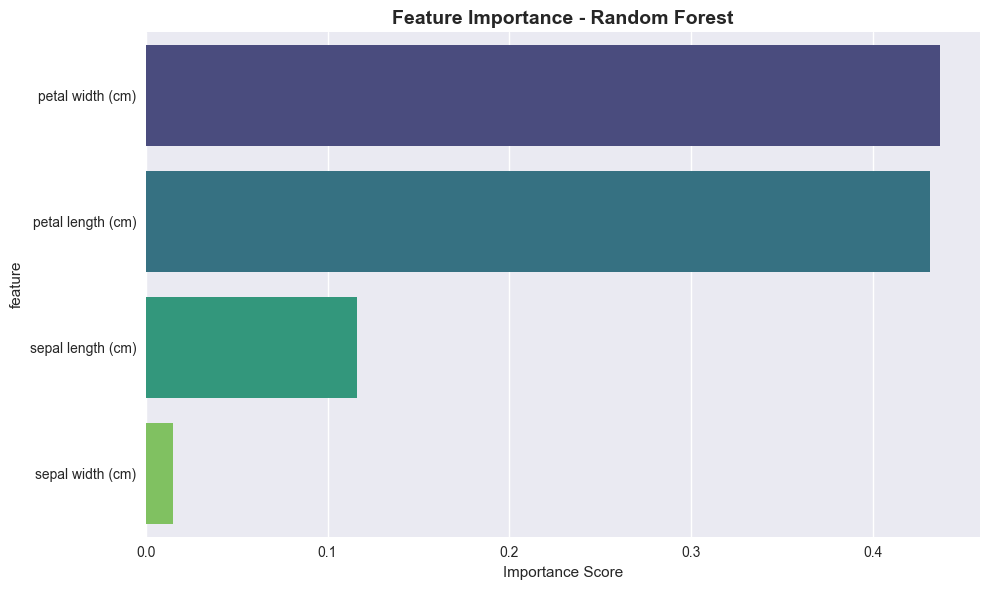

In [25]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [26]:
# 10. PREDICTION FUNCTION

def predict_iris_species(sepal_length, sepal_width, petal_length, petal_width, model=best_model, model_name=best_model_name):
    """
    Predict iris species based on flower measurements
    
    Parameters:
    - sepal_length: float, sepal length in cm
    - sepal_width: float, sepal width in cm  
    - petal_length: float, petal length in cm
    - petal_width: float, petal width in cm
    - model: trained model object
    - model_name: string, name of the model
    
    Returns:
    - prediction: string, predicted species name
    - probabilities: array, prediction probabilities (if available)
    """
    
    # Create input array
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    
    # Scale input if needed
    if model_name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
        input_data = scaler.transform(input_data)
    
    # Make prediction
    prediction = model.predict(input_data)[0]
    species_names = ['Setosa', 'Versicolor', 'Virginica']
    predicted_species = species_names[prediction]
    
    # Get probabilities if available
    probabilities = None
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(input_data)[0]
    
    return predicted_species, probabilities

# Predictions
print("Predictions:")

# Test cases
test_cases = [
    (5.1, 3.5, 1.4, 0.2),  # Setosa
    (6.0, 3.0, 4.5, 1.5),  # Versicolor  
    (6.5, 3.0, 5.5, 2.0),  # Virginica
]

for i, (sl, sw, pl, pw) in enumerate(test_cases, 1):
    species, probs = predict_iris_species(sl, sw, pl, pw)
    print(f"Test {i}: Sepal({sl}, {sw}), Petal({pl}, {pw}) -> {species}")
    if probs is not None:
        print(f"  Probabilities: Setosa={probs[0]:.3f}, Versicolor={probs[1]:.3f}, Virginica={probs[2]:.3f}")

Predictions:
Test 1: Sepal(5.1, 3.5), Petal(1.4, 0.2) -> Setosa
Test 2: Sepal(6.0, 3.0), Petal(4.5, 1.5) -> Versicolor
Test 3: Sepal(6.5, 3.0), Petal(5.5, 2.0) -> Virginica


In [27]:
# 11. SUMMARY AND CONCLUSIONS

print("IRIS CLASSIFICATION PROJECT SUMMARY")

print(f"\n📊 Dataset Overview:")
print(f"   • Total samples: {len(df)}")
print(f"   • Features: {len(features)}")
print(f"   • Classes: {len(df['species_name'].unique())}")
print(f"   • Class distribution: Balanced (50 samples each)")

print(f"\n🏆 Best Performing Model: {best_model_name}")
print(f"   • Test Accuracy: {results[best_model_name]['Accuracy']:.4f}")
print(f"   • Cross-validation: {results[best_model_name]['CV Mean']:.4f} ± {results[best_model_name]['CV Std']:.4f}")

print(f"\n📈 Key Insights:")
print(f"   • Petal measurements are more discriminative than sepal measurements")
print(f"   • Setosa species is easily separable from others")
print(f"   • Versicolor and Virginica have some overlap but are distinguishable")
print(f"   • All models achieved high accuracy (>90%) indicating well-separated classes")

print(f"\n🔧 Technical Notes:")
print(f"   • Feature scaling improved performance for distance-based algorithms")
print(f"   • Cross-validation confirmed model robustness")
print(f"   • No overfitting observed due to sufficient data and simple problem")

print(f"\n✨ Project completed successfully!")

# Optional: Save the best model
import joblib
joblib.dump(best_model, f'best_iris_model_{best_model_name.lower().replace(" ", "_")}.pkl')
joblib.dump(scaler, 'iris_feature_scaler.pkl')
print(f"\n💾 Best model and scaler saved to files!")

IRIS CLASSIFICATION PROJECT SUMMARY

📊 Dataset Overview:
   • Total samples: 150
   • Features: 4
   • Classes: 3
   • Class distribution: Balanced (50 samples each)

🏆 Best Performing Model: Support Vector Machine
   • Test Accuracy: 0.9667
   • Cross-validation: 0.9667 ± 0.0312

📈 Key Insights:
   • Petal measurements are more discriminative than sepal measurements
   • Setosa species is easily separable from others
   • Versicolor and Virginica have some overlap but are distinguishable
   • All models achieved high accuracy (>90%) indicating well-separated classes

🔧 Technical Notes:
   • Feature scaling improved performance for distance-based algorithms
   • Cross-validation confirmed model robustness
   • No overfitting observed due to sufficient data and simple problem

✨ Project completed successfully!

💾 Best model and scaler saved to files!
